# Folha_5

1000
31.622776601683793
47.05604987885166
0.001203789131730537
1.4880048859218276


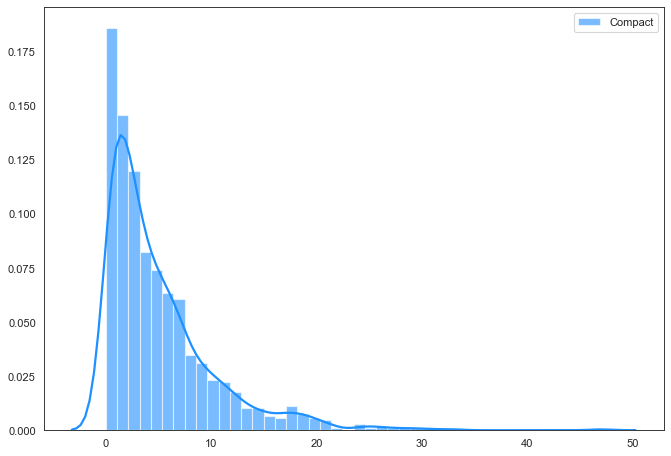

In [43]:
#Exercicio_1
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

#importação dos dados do ficheiro externo para a matriz dat
dat=np.loadtxt("folha5-data1.txt")

x = dat

print(len(x))
print(sqrt(len(x)))
print(max(x))
print(min(x))
print((max(x)-min(x))/(sqrt(len(x))))

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x, color="dodgerblue", label="Compact", **kwargs)
#plt.xlim(50,75)
plt.legend();

In [24]:
#Exerccio_2
from pylab import plot, show, ylim, xlabel, ylabel, imshow, gray, colorbar, scatter, hot
from numpy import linspace, sin, cos, loadtxt, pi, exp, sqrt, empty, arange, zeros, array, meshgrid, full, dot
import math
def f(x):
    return sin(x)

#delta = math.pow(10, -8)
delta=10**-8
print(delta)
print( (f(1 + delta) - f(1) )/delta)
print(cos(1))
# for smaller and smaller delta, the approximation of the limit gets better, but at some point it gets worse due to
# numerical error arising from the difference of numbers that are nearly equal.

1e-08
0.5403023028982545
0.5403023058681397


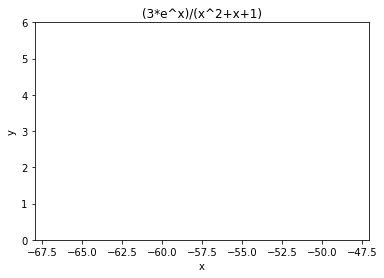

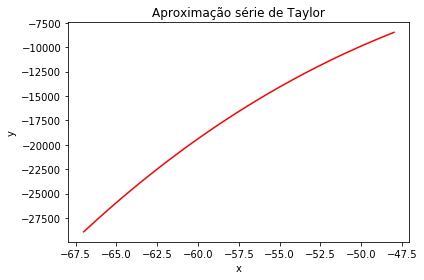

In [8]:
#TPC_01
import sympy as sp
import numpy as np
import math
import matplotlib.pyplot as plt
from math import e
from sympy.functions import sin,cos


#print da função
a=np.linspace(-67,-48)
ordem=3
centro=0

def f(a):
    return((9*10**-5*a**5) + (0.0201*a**4) + (1.7395*a**3) + (65.389*a**2) + (866.89*a) - (1471.2))
y0=[f(b) for b in a ] #dá nos o valor da função e guarda


#polinomio de taylor
x=sp.Symbol('x')

def fderiv(x,i):  #Expressão da função (derivada)
    return sp.diff((9*10**-5*x**5) + (0.0201*x**4) + (1.7395*x**3) + (65.389*x**2) + (866.89*x) - (1471.2),x,i)

def P3(a):#função que calcula a serie de taylor
    function = f(centro)
    for i in range(1,ordem+1):
        coef = sp.lambdify((x),fderiv(x,i),"numpy")
        num = a**(i)
        denom = math.factorial(i)
        function += (coef(centro)*(num))/(denom)
    return function
              
        
def fderiv1(x):  #primeira derivada
    return sp.diff((9*10**-5*x**5) + (0.0201*x**4) + (1.7395*x**3) + (65.389*x**2) + (866.89*x) - (1471.2),x,1)
y1=sp.lambdify((x),fderiv1(x),"numpy") #função que perimte calcular o valor da derivada, ou seja, dá valor ao x
def fderiv2(x):  #segunda derivada
    return sp.diff((9*10**-5*x**5) + (0.0201*x**4) + (1.7395*x**3) + (65.389*x**2) + (866.89*x) - (1471.2),x,2)
y2=sp.lambdify((x),fderiv2(x),"numpy")
def fderiv3(x):  #terceira derivada
    return sp.diff((9*10**-5*x**5) + (0.0201*x**4) + (1.7395*x**3) + (65.389*x**2) + (866.89*x) - (1471.2),x,3)
y3=sp.lambdify((x),fderiv3(x),"numpy")


#plot das duas funções
plt.figure()
plt.plot(a,y0,'g')
plt.ylim([0,6])
plt.plot(a,P3(a),'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title("(3*e^x)/(x^2+x+1)")
#plt.title('Aproximação série de Taylor')

plt.figure()
plt.plot(a,P3(a)/10,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximação série de Taylor')
plt.tight_layout()

__________________________________________________
A velocidade média é = 0.033498 m/s
__________________________________________________
A velocidade angular é = 0.069813 radianos/s
__________________________________________________
O comprimento de onde é = 3.015 m
__________________________________________________
O periodo é = 90.0 s
__________________________________________________
A frequencia é = 0.011 hz
__________________________________________________


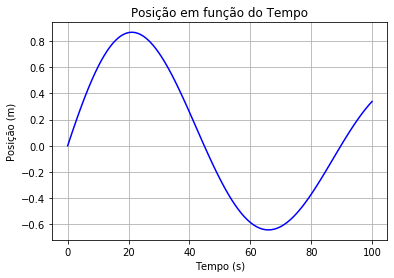

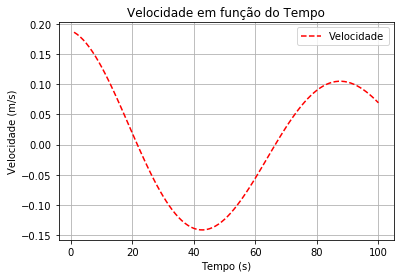

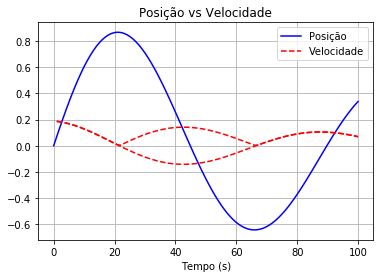

In [10]:
#TPC_02
"""
Script para calcular a partir de um ficheiros txt a velocidade média
Comparar com gráfico a velocidade, posição em função do tempo
"""
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics


#importação dos dados do ficheiro externo para a matriz dat
dat=np.loadtxt("F5Exercico1.txt")

x = [x[0] for x in dat]
y = [x[1] for x in dat]

#Calculo da velocidade pela variação do coluna de posição(y) em função da variação da coluna de tempo(x)
v= abs(np.diff(y)/np.diff(x)) #retorno a derivada entre a variação da posição em função da variação do tempo em módulos
va= np.diff(y)/np.diff(x) #retorno a derivada entre a variação da posição em função da variação do tempo

vm = statistics.mean(v) #calculo da média velocidade
mx = max(y) #retorno o valor maximo da posição
mx_pos = y.index(mx) #retorno o valor indice quando a posição é maximo
mn = min(y) #retorno o valor minimo da posição
mn_pos = y.index(mn) #retorno o valor do indice quando a posição é minima
tmx = x[mx_pos] #retorno o valor tempo quando a posição é maximo
tmn = x[mn_pos] #retorno o valor tempo quando a posição é minima
dt=tmn-tmx #retorno a variação do tempo entre a maxima e a minima


#calculo do valor do comprimento de onda
dl=abs(mx)+abs(mn)
#calculo da frequencia, periodo e velocidade angular
T=dt*2
f=1/T
w=(2*math.pi)/T
lambd=vm*T #retorno o valor do comprimento de onda


print("__________________________________________________")
print("A velocidade média é =", round(vm,6), "m/s")
print("__________________________________________________")
print("A velocidade angular é =", round(w,6), "radianos/s")
print("__________________________________________________")
print("O comprimento de onde é =", round(lambd,3), "m")
print("__________________________________________________")
print("O periodo é =", round(T,3), "s")
print("__________________________________________________")
print("A frequencia é =", round(f,3), "hz")
print("__________________________________________________")


#normalização da velocidade, função que suaviza as pequenas variações
v=v/np.linalg.norm(v); # normaliza a velocidade
va=va/np.linalg.norm(va); # normaliza a velocidade


#Grafico posição em função do tempo
plt.close('all')
plt.figure()
plt.title("Posição em função do Tempo")
plt.plot(x,y,'b');
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.grid(True)

#Grafico Velocidade em função do tempo
plt.figure()
plt.plot(x[1:len(x)],va,'r--',label='Velocidade');
#plt.plot(x[1:len(x)],v,'g--',label='Velocidade');
plt.title("Velocidade em função do Tempo")
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.legend(['Velocidade', '|Velocidade|'], loc=0)
plt.grid(True)

#Grafico Velocidade vs posição
plt.figure()
plt.plot(x,y,'b', label='Posição');
plt.plot(x[1:len(x)],va,'r--',label='Velocidade');
plt.plot(x[1:len(x)],v,'r--',label='Velocidade');
plt.title("Posição vs Velocidade")
plt.xlabel('Tempo (s)')
plt.legend(['Posição', 'Velocidade'], loc=0)
plt.grid(True)

# Folha_6

In [46]:
#Exercicio 1 - Método do trapésio
from math import sqrt,log,cos,sin,pi
from random import random

def f(x):
    return sin(1/x(2-x))*sin(1/x(2-x))

N = 1000
a = 0.0
b = 2
h = (b-a)/N

s = 0.5*f(a) + 0.5*f(b)
for k in range(1,N):
    s += f(a+k*h)

print(h*s)

TypeError: 'float' object is not callable

In [12]:
#Exercicio 1 - Método dos retângulos
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics


f = lambda x: np.sin(x)

a = 0  
b = math.pi  
n = 10000  
h = (b-a)/n  
x = np.linspace(a,b,n+1)  
 
S_esq = 0  
S_dir = 0  
S_med = 0  
 
#print("Soma de Riemman de {} a {} com {} intervalos:\n".format(a, b, n))  
 
for i in range(n):  
    S_esq += f(x[i])*h  
#print("A esquerda: {:.5e}".format(S_esq))  
 
for i in range(n):  
    S_dir += f(x[i+1])*h  
#print("A direita: {:.5e}".format(S_dir))  
 
for i in range(n):  
    S_med += f(((x[i]) + (x[i+1]))/2)*h  
print("Pelo ponto medio: {:.5e}".format(S_med))

Pelo ponto medio: 2.00000e+00


In [13]:
#Exercicio 1 - Método do Simpson
from __future__ import division, print_function
import numpy as np

def  simIntegrate(f, a, b, N):
    """
    Intgrate the function f(x) where a,b are the 
    lower,higher limits using the Simpson's rule for N steps

    Note this implimentation uses a 3 points over one step implimentation
    which is valid for odd & even number of steps where as the 
    3 points over two steps implimentations requires an even number of steps.
    
    This approach is like half stepping making the effective number of steps N
    equiliviant to 2*N.
    """
    h = (b-a)/N
    s1, s2 = 0.0, 0.0
    for k in range(0, N):
        if not k == 0:
            s1 += f(a+k*h)
        s2 += f(a+(k+0.5)*h)
    
    return (f(a) + f(b) + 2*s1 + 4*s2)*h/6

def  simIntegrate2(f, a, b, N):
    """
    This is the Simpson's rule implimentation following the 
    prescription given in Newman's textbook.  The results from
    this integration with N steps will give identical results
    to the function simIntegrate above but with N/2 steps.
    """ 
    h = (b-a)/N
    s1 = 0.0
    for k in range(1, N, 2):
        s1 += f(a+k*h)

    s2 = 0.0
    for k in range(2, N, 2):
        s2 += f(a+k*h)

    return (f(a) + f(b) + 4*s1 + 2*s2)*h/3

  
def fx(x):
    """ integrand function """
    return np.sin(x)

N = 100        # number of steps
a = 0.0        # lower x limit
b = math.pi        # upper x limit
h = (b-a)/N    # step size
actualValue = 2

print("Nsteps\t I_Simp1\t\t I_Simp2\t\t Fractional Error")
for N in [10, 100, 1000]:
    I = simIntegrate(fx, a, b, N)
    I2 = simIntegrate2(fx, a, b, 2*N)    
    fractionalError = 100*abs(actualValue - I)/actualValue
 
    print("{0}\t {1:2.10e}\t {2:2.10e}\t {3:e}%".format(N, I, I2, fractionalError), sep="")


Nsteps	 I_Simp1		 I_Simp2		 Fractional Error
10	 2.0000067844e+00	 2.0000067844e+00	 3.392221e-04%
100	 2.0000000007e+00	 2.0000000007e+00	 3.382359e-08%
1000	 2.0000000000e+00	 2.0000000000e+00	 3.308465e-12%


In [17]:
#Exercicio 1 - Monte Carlo
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.stats import norm


def f(x):
    return np.sin(x)

def f1(x):
    return np.exp(x)

#para integrais utilizar sempre esta forma de monte carlo
a = 0        #limite de integração
b = np.pi
a1 = 0
b1 = 2.5
N = 100000
rd.seed()
r = 0
r1 = 0
h = (b-a)/N#passo para a funçao f
h1 = (b1-a1)/N#passo para a função f1
for i in range (1,N):
    x = b*rd.random()
    r += f(x)
integral = r*h
print('O integral de f(x) é: ', integral)

for i in range (1,N):
    x = b1*rd.random()
    r1 += f1(x)
integral1 = r1*h1
print('O integral de f1(x) é: ', integral1)



O integral de f(x) é:  2.000513973292133
O integral de f1(x) é:  11.135331846422838


In [ ]:
#Exercicio 2 - Pendulo
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.stats import norm

def f(x):
    return 1/(np.sqrt(np.cos(x)))

a = 0        #limite de integração
b = np.pi/2

integral = ((b-a)/6)*(f(a) + 4*f((a+b)/2) + f(b))#método de simpson
print('O integral de f(x) é: ', integral)
print('T/T0 = ', (np.sqrt(2)/np.pi)*integral)

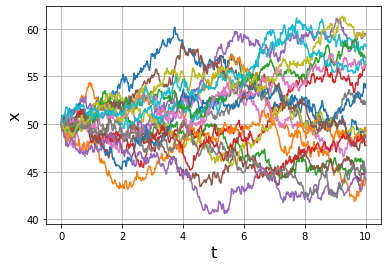

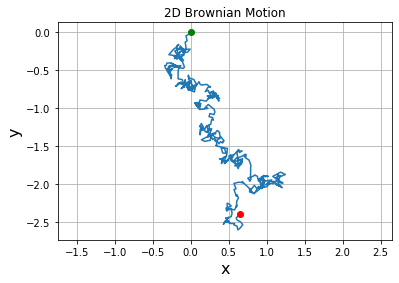

In [16]:
#Exercicio 3 - O movimento Browniano
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.stats import norm

def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*np.sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 20
# Create an empty array to store the realizations.
x = np.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

#método
brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = np.linspace(0.0, N*dt, N+1)
for k in range(m):
    plt.plot(t, x[k])
plt.xlabel('t', fontsize=16)
plt.ylabel('x', fontsize=16)
plt.grid(True)
plt.show()
plt.figure()

# The Wiener process parameter.
delta = 0.25
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Initial values of x.
x = np.empty((2,N+1))
x[:, 0] = 0.0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

# Plot the 2D trajectory.
plt.plot(x[0],x[1])

# Mark the start and end points.
plt.plot(x[0,0],x[1,0], 'go')
plt.plot(x[0,-1], x[1,-1], 'ro')

# More plot decorations.
plt.title('2D Brownian Motion')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.axis('equal')
plt.grid(True)
plt.show()


In [15]:
#TPC - Exercicio 4 - Metodo Monte Carlo
from math import sqrt,log,cos,sin,pi
from random import random

# Constants
Z = 79
e = 1.602e-19
E = 7.7e6*e
epsilon0 = 8.854e-12
a0 = 5.292e-11
sigma = a0/100
N = 10000

# Function to generate two Gaussian random numbers
def gaussian():
    r = sqrt(-2*sigma*sigma*log(1-random()))
    theta = 2*pi*random()
    x = r*cos(theta)
    y = r*sin(theta)
    return x,y

# Main program
count = 0
for i in range(N):
	x,y = gaussian()
	b = sqrt(x*x+y*y)
	if b<Z*e*e/(2*pi*epsilon0*E):
		count += 1

print(count,"particles were reflected out of",N)

14 particles were reflected out of 10000
